# Given Catchment extract some cross section profiles

In [6]:
import rioxarray
import geopandas as gpd
import pandas as pd
import numpy as np
import xrspatial
from shapely import Point, LineString, Polygon
import matplotlib.pyplot as plt

from valleys.cross_section import plot_cross_section_profile, map_cross_sections, preprocess_channel, get_cross_section_points

In [2]:
dem = rioxarray.open_rasterio("../toy_data/11_dem.tif").squeeze()
hand = rioxarray.open_rasterio("../toy_data/11_hand.tif").squeeze()
flowline = gpd.read_file("../toy_data/11_streamline.shp")
stream_raster = rioxarray.open_rasterio("../toy_data/11_stream.tif").squeeze()

hand = hand.where(hand != -32768, np.nan)
stream_raster = stream_raster.where(stream_raster != -32768, np.nan)

slope = xrspatial.slope(hand)

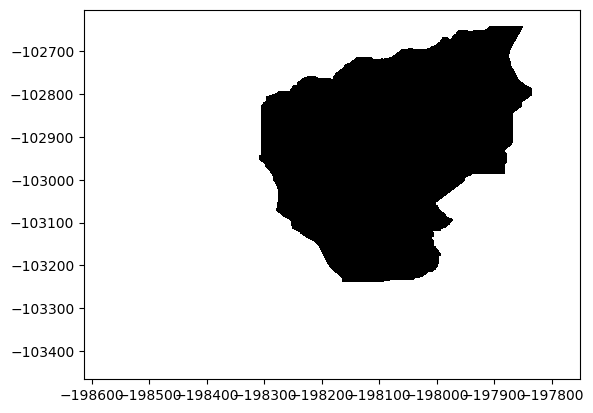

In [8]:
centerline = preprocess_channel(flowline['geometry'][0], method='centerline', hand=hand, contour_levels = [0,3,5,10,100])

In [9]:
points_df = get_cross_section_points(centerline, hand, slope, xs_spacing=10, xs_width=200, xs_point_spacing=5)
points_df

,alpha,elevation,slope,point,cross_section
0,-200,119.146116,8.283040,POINT (-198329.07052593044 -102992.18899796973),0
1,-195,118.278486,9.608321,POINT (-198327.2404359487 -102987.53595910691),0
2,-190,118.203581,9.155859,POINT (-198325.410345967 -102982.88292024411),0
3,-185,117.514051,13.163662,POINT (-198323.5802559853 -102978.2298813813),0
4,-180,117.013105,NaN,POINT (-198321.75016600356 -102973.57684251848),0
...,...,...,...,...,...
77,180,NaN,NaN,POINT (-198188.17978679467 -103249.50274411078),54
78,185,NaN,NaN,POINT (-198192.97189019364 -103250.92953947574),54
79,190,NaN,NaN,POINT (-198197.7639935926 -103252.3563348407),54
80,195,NaN,NaN,POINT (-198202.5560969916 -103253.78313020566),54


<Axes: >

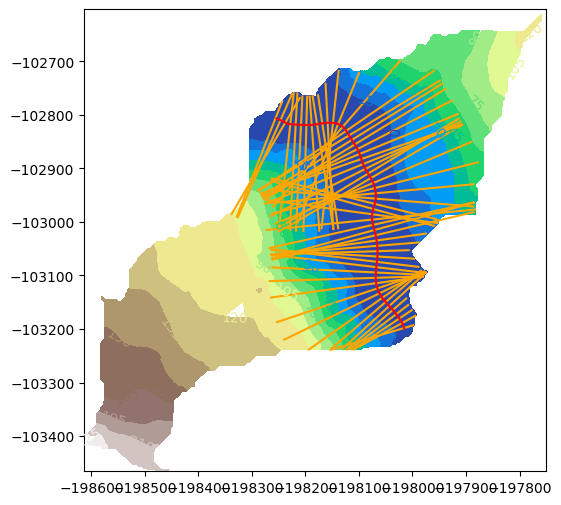

In [10]:
map_cross_sections(points_df, hand, centerline)

<Axes: >

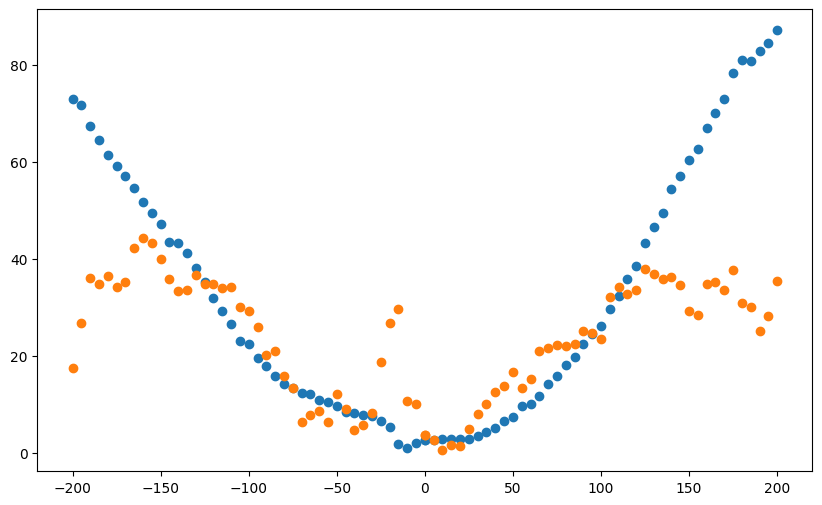

In [12]:
plot_cross_section_profile(points_df.loc[points_df['cross_section'] == 15])

In [15]:
points_df.to_csv("../toy_data/11_cross_sections.csv")